# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

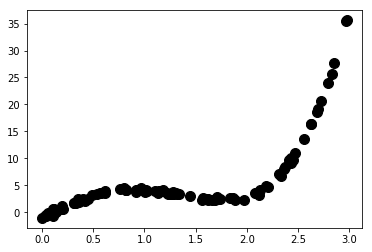

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)   # 60% do treningu, 40% do testu

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [5]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [6]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())   # wielomian st 2 -> funk. kwadratowa
model2.fit(X_train, y_train)   # trenuj na danych treningowych
model2.predict(X_test)         # sprawdź na danych testowych

array([ 0.82245603,  1.07251399, 18.51996233,  0.27706879, 12.75791091,
        1.72829641,  1.73606432,  1.16478574,  3.63931498,  1.30148   ,
       19.07261756,  3.42879478, 21.13185364,  7.07502871,  1.06525796,
        1.50533877,  3.66219052,  0.90640568, 13.38736907,  6.09016315,
        0.63662785,  0.36388151,  0.53375098, 15.92528559,  1.27749844,
        4.50722317,  3.08170432,  1.61550447,  9.82562893,  5.56248451,
        3.95736535,  2.85817067,  0.30967532,  0.42244783,  2.42380388,
        0.54190959,  0.91533513,  1.18703427,  0.43793783,  4.35200016])

In [11]:
print("R^2: {}".format(metrics.r2_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

R^2: 0.7049742128082128
Explained variance score: 0.7058052260893091
Explained variance score: 0.7058052260893091
Median absolute error: 2.7484798623585904
Mean squared error: 9.069940300516404
Mean absolute errors: 2.651130056196414


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regresji linowej
- regresji wielomianowej stopnia 2
- regresji wielomianowej stopnia 3
- regresji wielomianowej stopnia 4
- regresji wielomianowej stopnia 5
- regresji wielomianowej stopnia 25

In [8]:
# wielonian st.5

model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())   # wielomian st 2 -> funk. kwadratowa
model5.fit(X_train, y_train)   # trenuj na danych treningowych
model5.predict(X_test)         # sprawdź na danych testowych

array([ 3.84041097,  2.74341132, 19.28293287,  4.15303098,  8.17690354,
        1.78060696,  1.76971146,  3.58103938, -0.56890323,  2.39716942,
       20.62572573,  2.42467307, 26.04008106,  2.74038231,  3.65483527,
        3.34136389, -0.59301719,  3.77551509,  9.12574837,  2.39861519,
        3.98499651,  4.1790391 ,  3.61721825, 13.61799634,  3.49941824,
        2.24359178,  2.53355252,  1.94009663,  4.65264767,  2.29227219,
       -0.89555685,  0.31168319,  4.04935565,  4.14327316,  0.84905459,
        3.60300328,  2.98830556,  2.56877705,  4.13282795,  2.25513957])

In [10]:
print("R^2: {}".format(metrics.r2_score(y_test, model5.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model5.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model5.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model5.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model5.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model5.predict(X_test)) ))

R^2: 0.9981570430011939
Explained variance score: 0.9981579974774196
Explained variance score: 0.9981579974774196
Median absolute error: 0.1546991532812303
Mean squared error: 0.056657792915993224
Mean absolute errors: 0.18750605481406687


In [12]:
# wszystkie w pętli
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))

LR
R^2: 0.5219239350398337
Explained variance score: 0.5219520066250175
Median absolute error: 2.432137295095436
Mean squared error: 14.697431738316931
Mean absolute errors: 3.088098812239892
PR2
R^2: 0.7049742128082128
Explained variance score: 0.7058052260893091
Median absolute error: 2.7484798623585904
Mean squared error: 9.069940300516404
Mean absolute errors: 2.651130056196414
PR3
R^2: 0.9762824931482607
Explained variance score: 0.9764836019934285
Median absolute error: 0.6685204376240845
Mean squared error: 0.7291443004693144
Mean absolute errors: 0.7284174305167446
PR4
R^2: 0.9980162543531095
Explained variance score: 0.9980168593242861
Median absolute error: 0.1192403805243657
Mean squared error: 0.060986040440626964
Mean absolute errors: 0.18024414646988723
PR5
R^2: 0.9981570430011939
Explained variance score: 0.9981579974774196
Median absolute error: 0.1546991532812303
Mean squared error: 0.056657792915993224
Mean absolute errors: 0.18750605481406687
PR6
R^2: 0.9980824676202